In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
import time
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Mba notes\novels\project data\Pubg datset\train_V2.csv")

In [3]:
df1.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df1.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [5]:
df1.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [6]:
df1.weaponsAcquired.value_counts()

2      768836
3      768347
4      689622
1      580951
5      540721
        ...  
77          1
75          1
74          1
71          1
236         1
Name: weaponsAcquired, Length: 97, dtype: int64

In [7]:
max(df1.weaponsAcquired)

236

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [9]:
len(df1[df1["weaponsAcquired"]>50])

165

In [10]:
df1[df1["weaponsAcquired"]>100].winPlacePerc

233643     0.7111
1437471    0.8929
2743408    0.7955
2749693    0.8846
2797867    0.5464
2982525    0.6786
Name: winPlacePerc, dtype: float64

In [11]:
for i in ["Id","groupId","matchId"]:
    print(f"unique [{i}] count: ",df1[i].nunique())

unique [Id] count:  4446966
unique [groupId] count:  2026745
unique [matchId] count:  47965


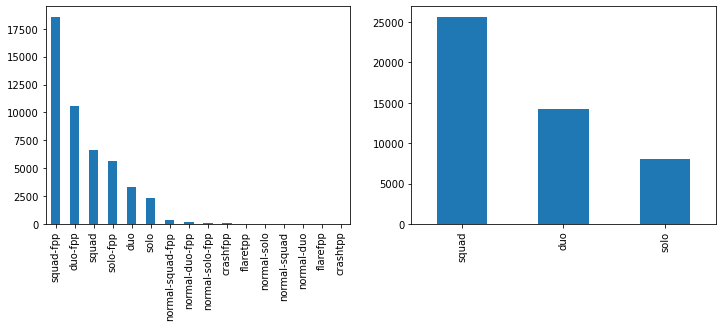

In [12]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
df1.groupby("matchId")["matchType"].first().value_counts().plot.bar(ax=ax[0])
mapper=lambda x:"solo" if ("solo" in x) else "duo" if ("duo" in x) or ("crash" in x) else "squad"
df1["matchType"]=df1["matchType"].apply(mapper)
df1.groupby("matchId")["matchType"].first().value_counts().plot.bar(ax=ax[1])

In [13]:
df1.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

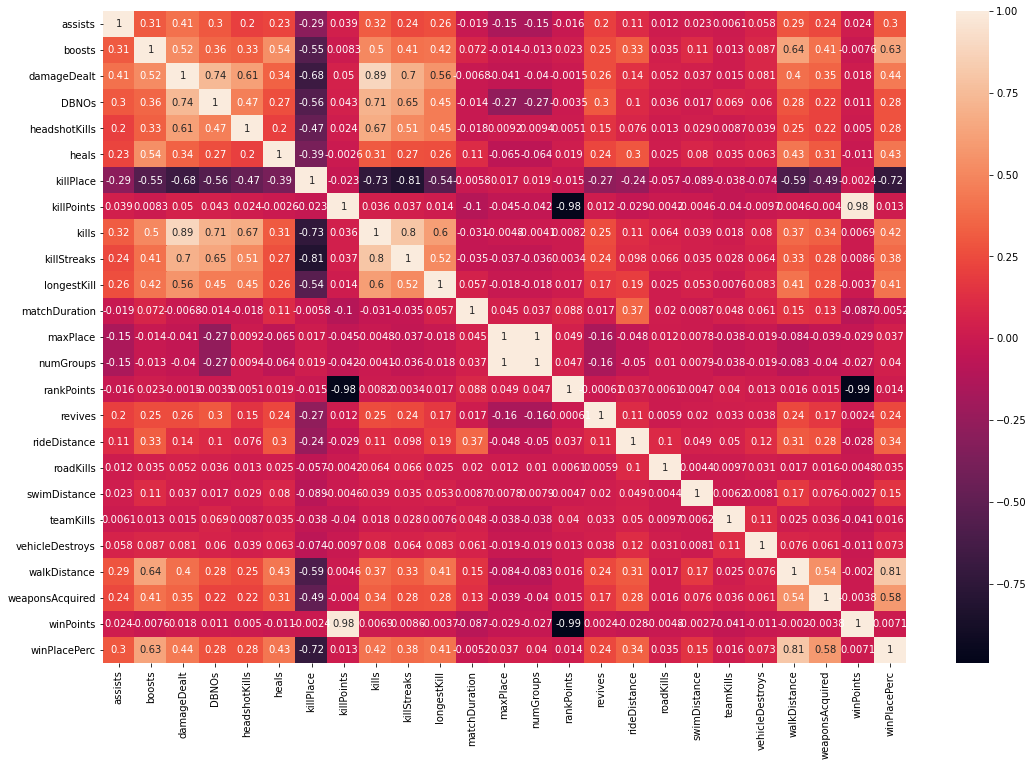

In [14]:
plt.figure(figsize=(18,12))
sns.heatmap(df1.corr(),annot=True)

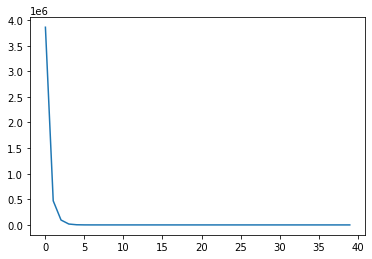

In [15]:
plt.plot(df1["revives"].groupby(df1["revives"]).count())

In [17]:
df1["revives"].groupby(df1["revives"]).count().mean()

177878.64

In [18]:
def mergeList(list1,list2):
    return list(itertools.product(list1,list2))

In [19]:
match=df1.groupby(["matchType","matchId"]).size().to_frame("players in match")
match

players in match
matchType matchId                         
duo       0003b92987589e               100
          0006eb8c17708d                93
          00086c74bb4efc                98
          001125344b660c                96
          001360264d4b5f                91
...                                    ...
squad     fff4d3cbb6c317               100
          fffa170cf8ed83                93
          fffd74b5150cb4                97
          fffe562611d981                94
          fffe92232706aa                93

[47965 rows x 1 columns]

In [20]:
match1=df1.groupby(["matchType","kills"]).size().to_frame("players in match")
match1

players in match
matchType kills                  
duo       0                760272
          1                256481
          2                151590
          3                 67991
          4                 38281
...                           ...
squad     46                    1
          49                    1
          53                    1
          55                    1
          72                    1

[138 rows x 1 columns]

In [21]:
match=df1.groupby(["matchType","matchId"]).size().to_frame("players in match")
group=df1.groupby(["matchType","matchId","groupId"]).size().to_frame("players in group")
pd.concat([match.groupby("matchType").describe()[mergeList(["players in match"],["min","mean","max"])],
           group.groupby("matchType").describe()[mergeList(["players in group"],["min","mean","max"])]],axis=1)

players in match                   players in group                
                       min       mean    max              min      mean   max
matchType                                                                    
duo                    7.0  92.985658  100.0              1.0  2.050456  72.0
solo                   1.0  89.031872  100.0              1.0  1.039249  64.0
squad                  5.0  93.723193  100.0              1.0  3.492575  74.0

In [22]:
print(group["players in group"].nlargest(5))

matchType  matchId         groupId       
squad      b30f3d87189aa6  14d6b54cdec6bc    74
duo        3e029737889ce9  b8275198faa03b    72
solo       41a634f62f86b7  128b07271aa012    64
duo        7e93ce71ac6f61  7385e5fe214021    49
squad      3c2531adf5b942  e52a2e6ca30474    36
Name: players in group, dtype: int64


In [29]:
subset=df1[df1["matchId"]=="3e029737889ce9"]
sub_grp=subset[subset["groupId"]=="b8275198faa03b"]
print("matchId==\"3e029737889ce9\" & groupId==\"b8275198faa03b\"")
print("-"*100)
print("players: ",len(subset))
print("groups: ",subset["groupId"].nunique())
print("numGroups: ",subset["numGroups"].unique())
print("maxPlace: ",subset["maxPlace"].unique())
print("-"*100)
print("max-group players: ",len(sub_grp))
print("max-group winPlacePerc: ",sub_grp["winPlacePerc"].unique())
print("-"*100)
print("winPlacePerc: ",subset["winPlacePerc"].sort_values().unique())

matchId=="3e029737889ce9" & groupId=="b8275198faa03b"
----------------------------------------------------------------------------------------------------
players:  99
groups:  14
numGroups:  [14]
maxPlace:  [50]
----------------------------------------------------------------------------------------------------
max-group players:  72
max-group winPlacePerc:  [0.2449]
----------------------------------------------------------------------------------------------------
winPlacePerc:  [0.     0.0204 0.0408 0.0612 0.0816 0.102  0.1224 0.1633 0.1837 0.2041
 0.2245 0.2449 0.5102 1.    ]


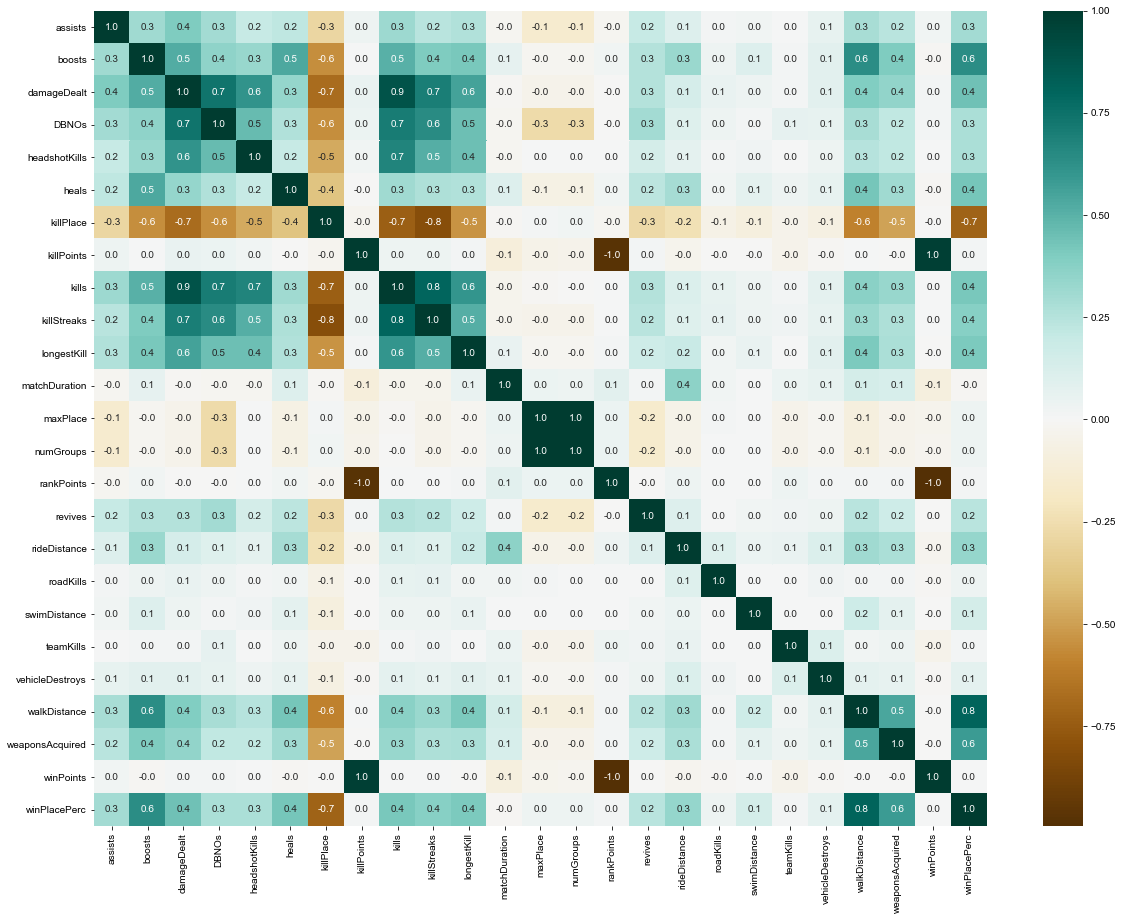

In [34]:
corr=df1.corr()
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True, fmt= ".1f",ax=ax,cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [35]:
df1.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [48]:
a="Ashish"
print(f"my name is {a}")

my name is Ashish


In [54]:
a=df1["kills"].mean()
b=df1["kills"].quantile(0.99)
c=max(df1["kills"])
print(f"Average kills by an person is {a} players,99% people have {b} kills, while max kills recorded is {c}")

Average kills by an person is 0.9247833241810259 players,99% people have 7.0 kills, while max kills recorded is 72


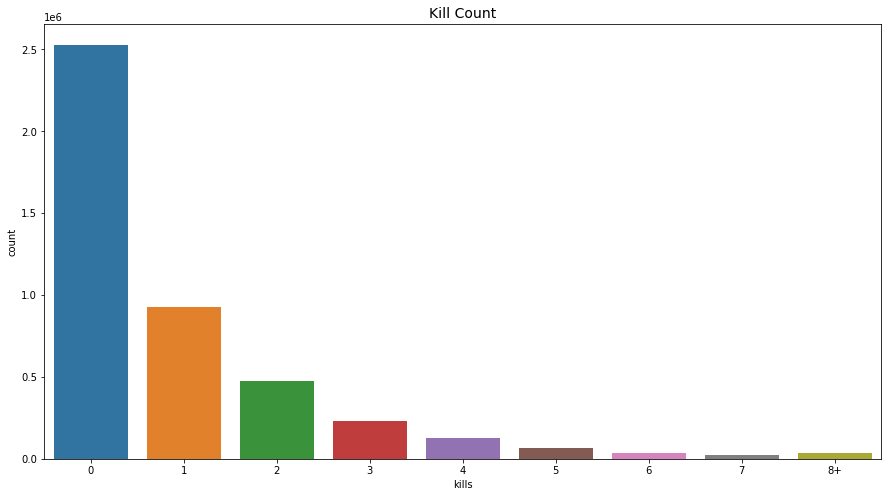

In [10]:
data=df1.copy()
data.loc[data["kills"]>data["kills"].quantile(0.99)]="8+"
plt.figure(figsize=(15,8))
sns.countplot(data["kills"].astype("str").sort_values())
plt.title("Kill Count",fontsize=14)
plt.show()


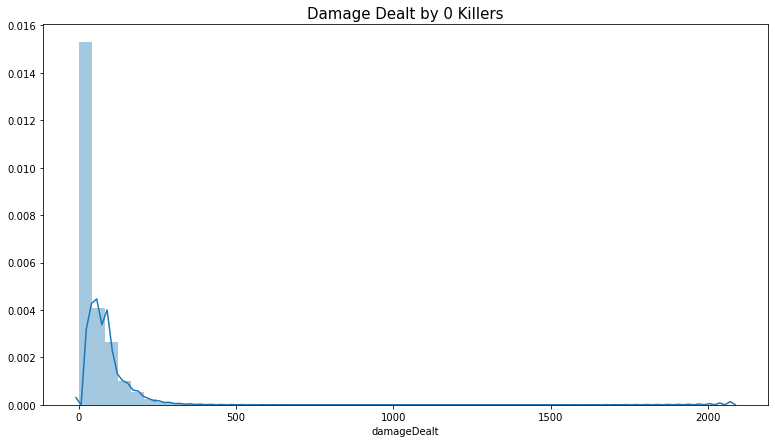

In [11]:
data=data[data["kills"]==0]
plt.figure(figsize=(13,7))
plt.title("Damage Dealt by 0 Killers",fontsize=15)
sns.distplot(data["damageDealt"])
plt.show()

In [86]:
print(len(data[data["winPlacePerc"]==1])," people won without killing." )
print(len(data[(data["damageDealt"]==0) & (data["winPlacePerc"]==1)])," people won without dealing any Damage")

16666  people won without killing.
4709  people won without dealing any Damage


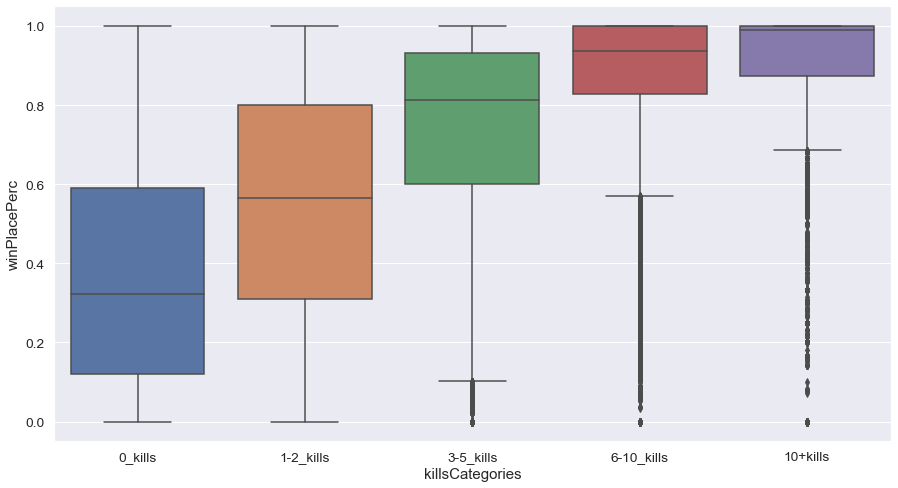

In [88]:
kills=df1.copy()
kills["killsCategories"]=pd.cut(kills["kills"],[-1,0,2,5,10,60],labels=["0_kills","1-2_kills","3-5_kills","6-10_kills","10+kills"])
plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories",y="winPlacePerc",data=kills)
plt.show()

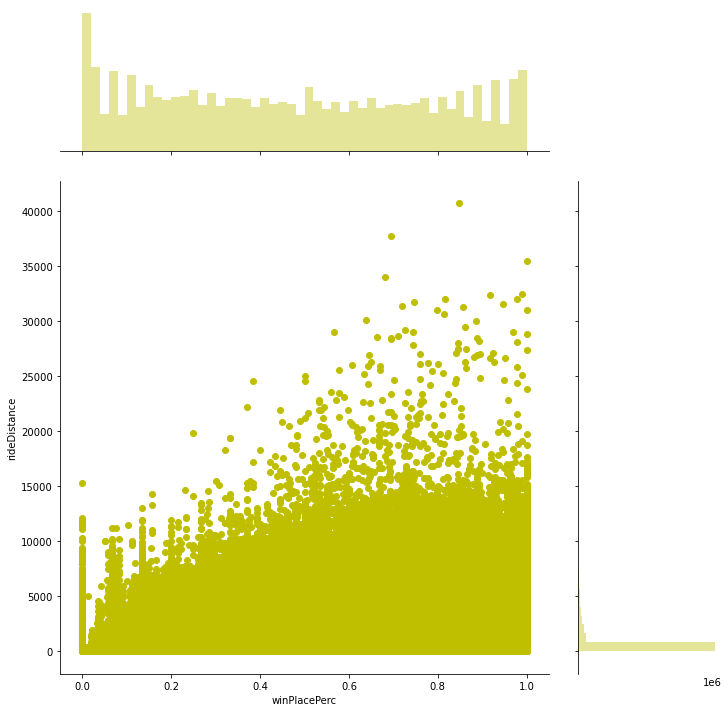

In [7]:
sns.jointplot(x="winPlacePerc",y="rideDistance",data=df1,height=10,ratio=3,color="y")

KeyboardInterrupt: 

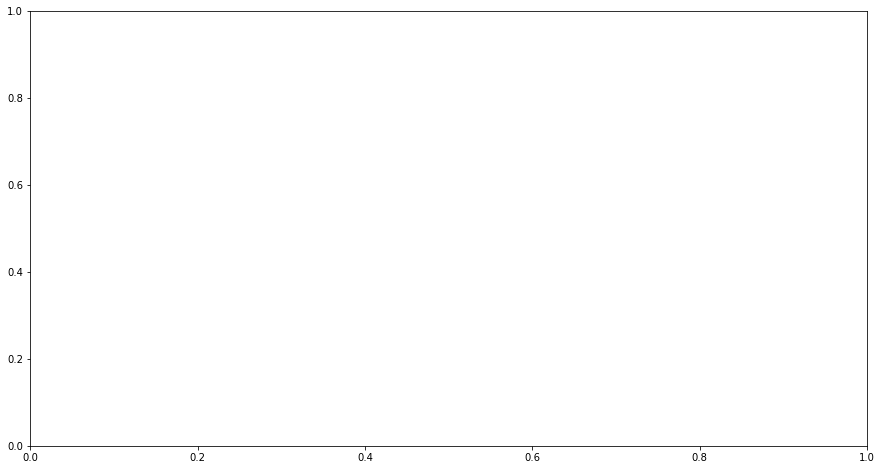

In [15]:
f,ax1=plt.subplots(figsize=(15,8))
sns.pointplot(x="vehicleDestroys",y="winPlacePerc",data=data,color="lime",alpha=0.5)
plt.xlabel("Count of vehicle Destroys",fontsize=16,color="blue")
plt.ylabel("Win Percentage",fontsize=16,color="blue")
plt.title("Vehicle Destroyed/Win Ratio",fontsize=20,color="blue")
plt.grid()
plt.show()

In [20]:
a=round(df1["heals"].mean(),1)
b=round(df1["boosts"].mean(),1)
print(f"Average heal items used = {a} ")
print(f"Average boost item used = {b}")

Average heal items used = 1.4 
Average boost item used = 1.1


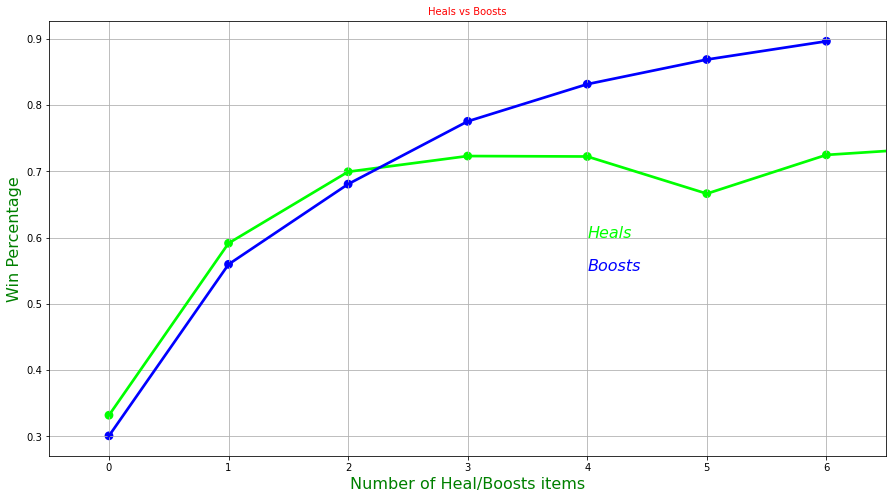

In [21]:
data=df1.copy()
data=data[data["heals"]<data["heals"].quantile(0.99)]
data=data[data["boosts"]<data["boosts"].quantile(0.99)]
f,ax1=plt.subplots(figsize=(15,8))
sns.pointplot(x="heals",y="winPlacePerc",data=data,color="lime",alpha=0.8)
sns.pointplot(x="boosts",y="winPlacePerc",data=data,color="blue",alpha=0.8)
plt.text(4,0.6,"Heals",color="lime",fontsize=16,style="italic")
plt.text(4,0.55,"Boosts",color="blue",fontsize=16,style="italic")
plt.xlabel("Number of Heal/Boosts items",fontsize=16,color="green")
plt.ylabel("Win Percentage",fontsize=16,color="green")
plt.title("Heals vs Boosts",fontsize=10,color="red")
plt.grid()
plt.show()

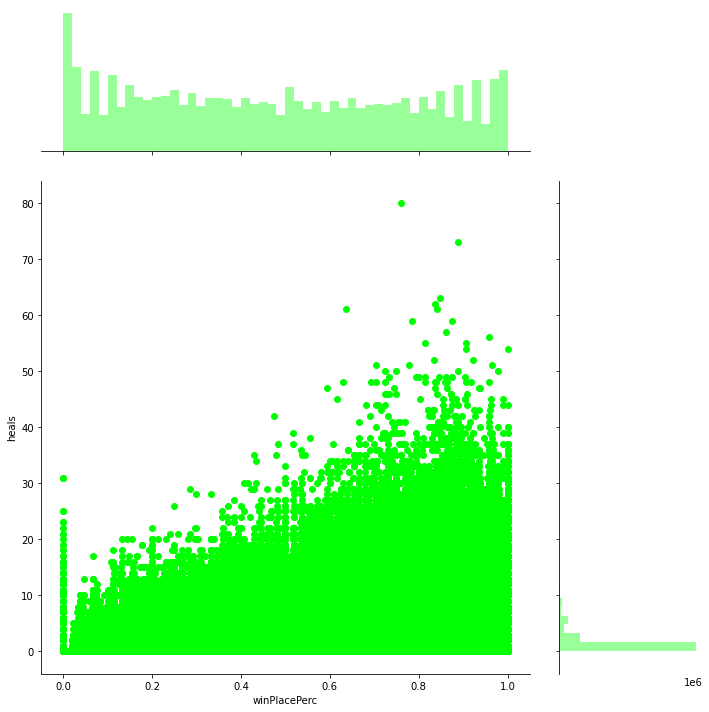

In [22]:
sns.jointplot(x="winPlacePerc",y="heals",data=df1,height=10,ratio=3,color="lime")
plt.show()

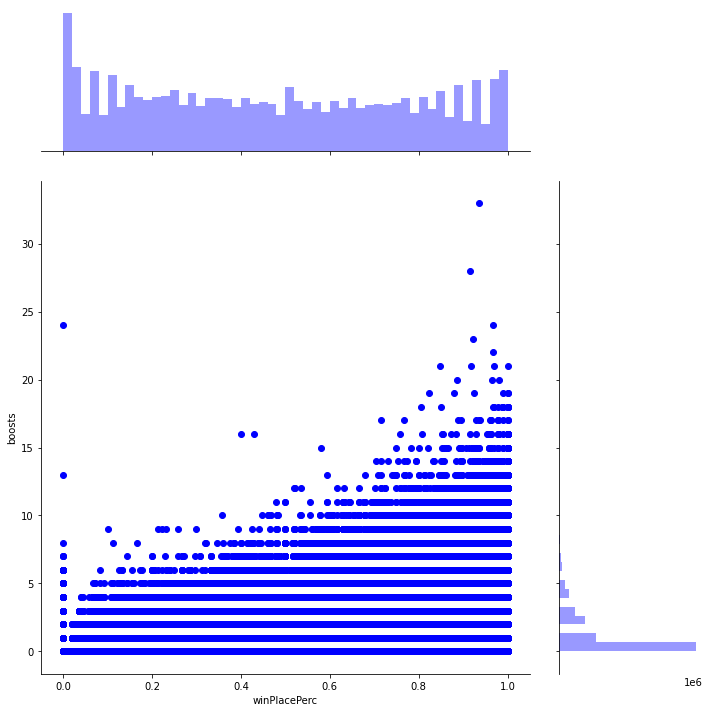

In [23]:
sns.jointplot(x="winPlacePerc",y="boosts",data=df1,height=10,ratio=3,color="blue")
plt.show()

In [29]:
solos=df1[df1["numGroups"]>50]
duos=df1[(df1["numGroups"]>25) & (df1["numGroups"]<=50)]
squads=df1[df1["numGroups"]<=25]
print((round(len(solos)*100)/len(df1)),"% of games are solo ",round((len(duos)*100)/len(df1),1),"% games are duos and ",round((len(squads)*100)/len(df1),1)," % are squads")

15.945950564946978 % of games are solo  74.1 % games are duos and  10.0  % are squads


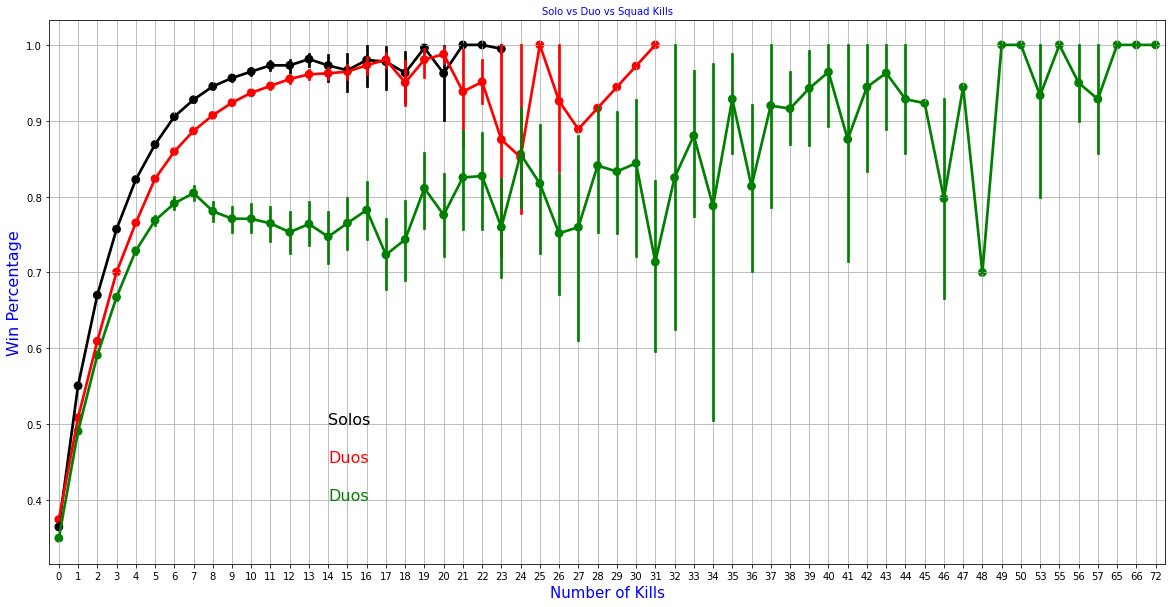

In [31]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x="kills",y="winPlacePerc",data=solos,color="black",alpha=0.6)
sns.pointplot(x="kills",y="winPlacePerc",data=duos,color="red",alpha=0.6)
sns.pointplot(x="kills",y="winPlacePerc",data=squads,color="green",alpha=0.6)
plt.text(14,0.5,"Solos",color="black",fontsize=16)
plt.text(14,0.45,"Duos",color="red",fontsize=16)
plt.text(14,0.4,"Duos",color="green",fontsize=16)
plt.xlabel("Number of Kills",fontsize=15,color="blue")
plt.ylabel("Win Percentage",fontsize=16,color="blue")
plt.title("Solo vs Duo vs Squad Kills",fontsize=10,color="blue")
plt.grid()
plt.show()

In [4]:
df1.shape

(4446966, 29)

In [3]:
df2=df1.dropna()
df2.shape

(4446965, 29)

In [4]:
df2["totalDistance"]=df2["rideDistance"]+ df2["walkDistance"] + df2["swimDistance"]

In [5]:
df2["headshotRate"]=df2["headshotKills"]/df2["kills"]
df2["headshotRate"]=df2["headshotRate"].fillna(0)

In [6]:
def show_countplot(column):
    plt.figure(figsize=(15,8))
    sns.countplot(data=df2,x=column).set_title(column)
    plt.show()
def show_distplot(column):
    plt.figure(figsize=(15,8))
    sns.distplot(df2[column],bins=50)
    plt.show()

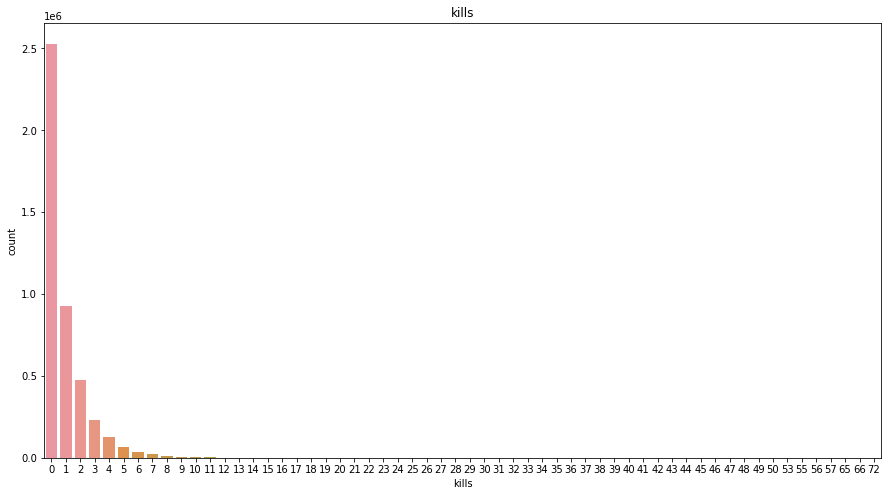

In [7]:
show_countplot("kills")

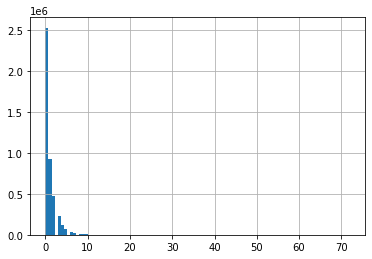

In [8]:
df1["kills"].hist(bins=100)

In [9]:
df2[(df2["kills"]>40) & (df2["weaponsAcquired"]>55) & (df2["totalDistance"]<100)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.0,0,0,23.71,61,0,0.7000,23.71,0.250000
672993,da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,...,0,0.0,0,0,24.27,56,0,1.0000,24.27,0.087719
770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,0,0.0,0,0,85.55,66,0,1.0000,85.55,0.127273
1378200,f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,5,...,0,0.0,0,0,46.71,72,0,0.7778,46.71,0.121951


In [10]:
df2=df2[~((df2["kills"]>40) & (df2["weaponsAcquired"]>55) & (df2["totalDistance"]<100))]

In [11]:
b=df2[(df2["kills"]>=40) & (df2["heals"]==0)]
df2[(df2["kills"]>=40) & (df2["heals"]==0)]


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0,0.0,1,0,718.3,16,1500,1.0,718.3,0.952381
2105633,770c02791306c4,48ca6706a90e10,6ee2c835176181,8,0,4272.0,40,34,0,1,...,0,0.0,0,0,80.4,21,0,1.0,80.4,0.790698
2316123,dbc81aa64a7e3d,c50fe5c54e8bb6,5d58307bae9b50,8,0,4106.0,31,3,0,1,...,0,0.0,0,0,1282.0,22,0,1.0,1282.0,0.075000
2601666,436d1530e9eb00,5c974c2bb9d9f0,fe7043ee6221c8,5,0,4347.0,0,31,0,1,...,0,0.0,0,0,134.3,36,0,1.0,134.3,0.584906
3924729,579949f753978c,108f4c00d80882,ff9cd80c0d8fb7,1,2,3680.0,0,35,0,1,...,0,0.0,0,0,1180.0,2,1500,1.0,1180.0,0.875000


In [12]:
abc={
    "Name":["John","Anny","Marry","Ronald"],
    "Height":[140,129,132,150],
    "weight":[150,132,123,121]
}

In [13]:
abc=pd.DataFrame(abc)
abc

,Name,Height,weight
0,John,140,150
1,Anny,129,132
2,Marry,132,123
3,Ronald,150,121


In [14]:
a=abc[~(abc["Height"]==132)]
a

,Name,Height,weight
0,John,140,150
1,Anny,129,132
3,Ronald,150,121


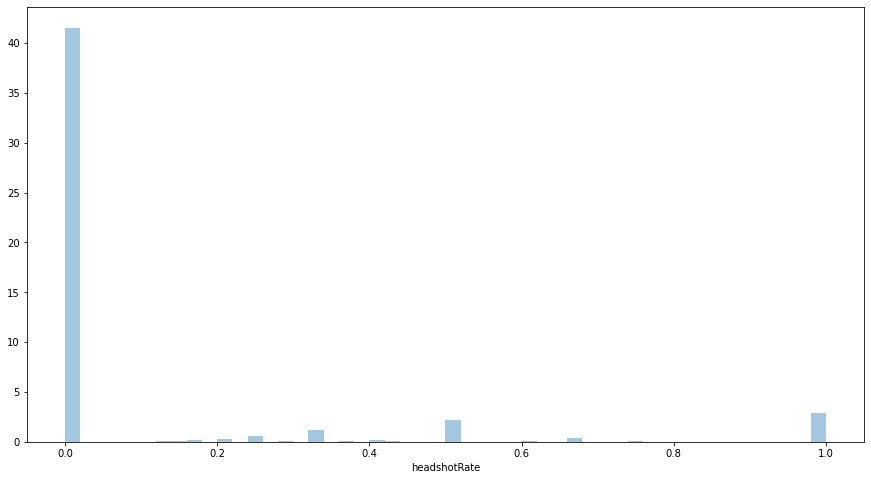

In [15]:
show_distplot("headshotRate")

In [16]:
df2[(df2["headshotRate"]==1) & (df2["kills"]>=10)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0,0.0,0,0,2939.0,5,0,0.8462,2939.00,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,0,0.0,0,0,3422.0,8,1560,1.0000,8142.00,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,0,0.0,0,0,2105.0,5,1587,1.0000,2105.00,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0,0.0,2,0,2761.0,7,1519,0.9630,7948.00,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,0,0.0,0,0,2458.0,4,1562,1.0000,3476.00,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,0,0.0,0,0,2932.0,4,0,1.0000,8178.00,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,0,0.0,0,0,2450.0,7,1468,1.0000,2858.90,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,0,0.0,0,0,3915.0,5,0,1.0000,5963.00,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,0,0.0,0,0,3108.0,7,1500,1.0000,3108.00,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,0,140.8,0,0,2339.0,4,0,1.0000,2479.80,1.0


In [17]:
df2.shape

(4446961, 31)

In [18]:
df2=df2[~((df2["headshotRate"]==1) & (df2["kills"]>=10))]
df2.shape

(4446937, 31)

In [19]:
df2["killswithoutMoving"]=((df2["kills"]>0) & (df2["totalDistance"]==0))
display(df2[df2["killswithoutMoving"]==True].shape)
df2[df2["killswithoutMoving"]==True].head(10)

(1535, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.000000,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,0.0,0.000000,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,0.0,0.200000,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.80,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,0.0,0.000000,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,0.0,1.000000,True
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0.0,0,0,0.0,8,0,0.8000,0.0,0.166667,True
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0.0,0,0,0.0,8,0,0.6000,0.0,0.333333,True
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.90,0,2,11,12,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.285714,True
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.90,0,1,6,53,...,0.0,0,0,0.0,12,1500,0.2857,0.0,0.500000,True
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.56,0,0,0,46,...,0.0,0,0,0.0,4,0,0.8571,0.0,0.000000,True


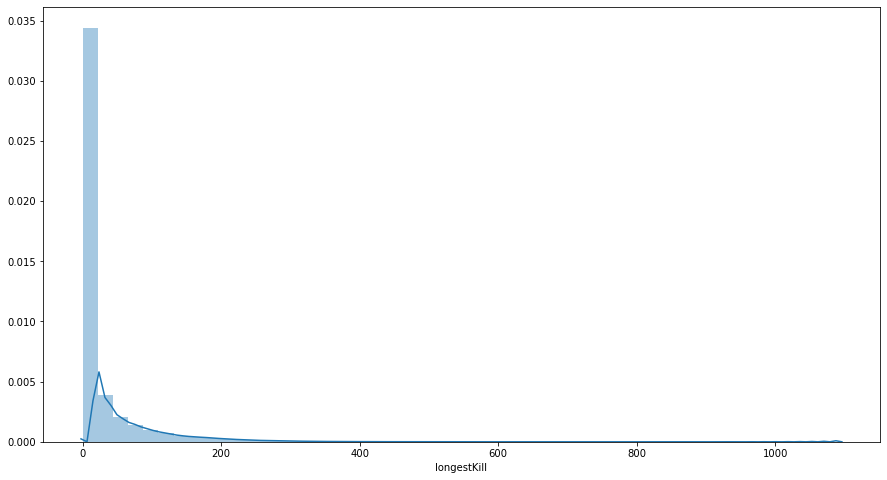

In [20]:
show_distplot("longestKill")

In [21]:
df2

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate,killswithoutMoving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.000,0,0,244.80,1,1466,0.4444,244.8000,0.0,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.040,0,0,1434.00,5,0,0.6400,1445.0445,0.0,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.000,0,0,161.80,2,0,0.7755,161.8000,0.0,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.000,0,0,202.70,3,0,0.1667,202.7000,0.0,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.000,0,0,49.75,2,0,0.1875,49.7500,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0.000,0,0,1019.00,3,1507,0.1786,2311.0000,0.0,False
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.000,0,0,81.70,6,0,0.2935,81.7000,0.0,False
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,2.184,0,0,788.70,4,0,0.4815,790.8840,0.0,False
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.000,0,0,2748.00,8,0,0.8000,2748.0000,0.5,False


In [22]:
df2=df2.drop(df2[df2["roadKills"]>10].index)

In [23]:
df2.shape

(4446933, 32)

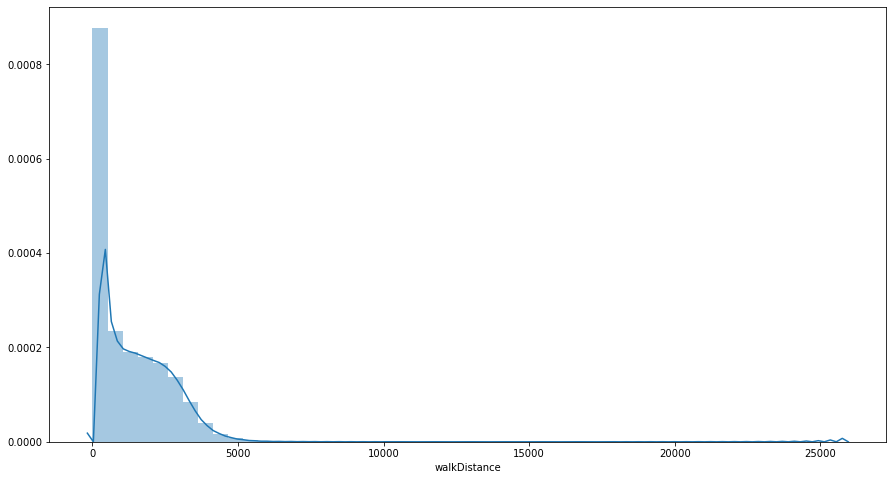

In [24]:
show_distplot("walkDistance")

In [25]:
df2=df2.drop(df2[(df2["walkDistance"]>=13000) & (df2["kills"]==0)].index)

In [26]:
df2=df2.drop(df2[(df2["walkDistance"]>=13000) & (df2["kills"]==0)].index)

In [27]:
df2=df2.drop(df2[(df2["rideDistance"]>=30000) & (df2["kills"]==0)].index)
df2=df2.drop(df2[(df2["walkDistance"]==0) & (df2["rideDistance"]==0)].index)
df2=df2.drop(df2[(df2["totalDistance"]==0)].index)

In [28]:
df2[df2["swimDistance"]>=2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate,killswithoutMoving
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.12,1,0,1,47,...,2295.0,0,0,1002.000,4,1466,0.9592,3297.000,0.000000,False
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.32,0,0,16,39,...,2148.0,0,0,2276.000,5,0,0.9600,10113.000,0.000000,False
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.00,4,3,1,6,...,2718.0,0,0,4691.000,5,1516,1.0000,10740.000,1.000000,False
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.30,3,1,6,4,...,2668.0,0,0,415.100,10,1499,1.0000,3083.100,0.200000,False
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.20,3,1,1,46,...,3823.0,0,0,995.300,9,0,1.0000,4818.300,0.500000,False
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.00,0,0,0,47,...,2484.0,0,0,1966.000,3,0,0.5833,5314.000,0.000000,False
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.59,0,0,5,48,...,3514.0,0,0,4296.000,8,1492,0.8511,9899.000,0.000000,False
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.40,2,0,0,7,...,2387.0,0,0,7.546,6,0,1.0000,2394.546,0.000000,False
2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.80,5,5,2,2,...,2206.0,0,0,4687.000,4,0,0.9600,9926.000,0.714286,False
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.00,0,0,0,77,...,2338.0,0,0,1750.000,0,1518,0.2143,4088.000,0.000000,False


In [29]:
df2=df2.drop(df2[df2["swimDistance"]>=2000].index)

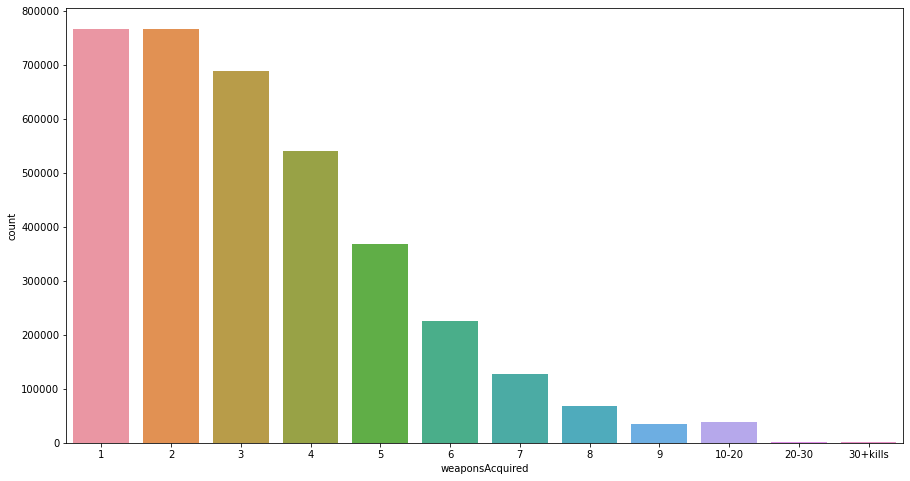

In [30]:
plt.figure(figsize=(15,8))
df3=df2.copy()
df3["weaponsAcquired"]=pd.cut(df3["weaponsAcquired"],[1,2,3,4,5,6,7,8,9,10,20,30,100],labels=["1","2","3","4","5","6","7","8","9","10-20","20-30","30+kills"],)
sns.countplot(df3["weaponsAcquired"])

In [31]:
display(df2[df2["weaponsAcquired"]>=80].shape)
df2[df2["weaponsAcquired"]>=80].head()

(21, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate,killswithoutMoving
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0.00,0,0,1307.0,128,1577,0.7111,3187.00,0.000000,False
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.30,1,0,2,48,...,0.00,0,0,1687.0,80,0,0.7500,1687.00,0.000000,False
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,47.21,0,0,2400.0,102,0,0.8929,5299.21,0.000000,False
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0.00,0,0,653.1,95,0,0.5600,653.10,0.000000,False
1462706,be4ff9afaa5bb1,abb73dd57619fa,f900de1ec39fa5,22,0,5377.00,0,8,4,3,...,0.00,0,0,1128.0,83,0,0.8000,2082.40,0.150943,False


In [32]:
df2=df2.drop(df2[df2["weaponsAcquired"]>=80].index)

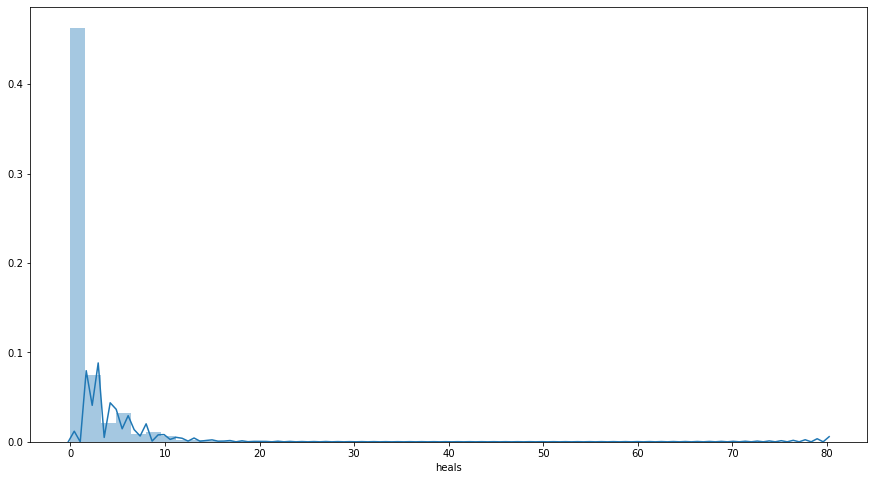

In [33]:
show_distplot("heals")

In [34]:
df2[df2["heals"]>=40].head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate,killswithoutMoving
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.0,0,0,47,43,...,0.000,0,0,1387.0,6,0,0.9368,6854.000,0.000000,False
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.0,0,1,43,21,...,292.400,0,0,2791.0,7,0,0.9615,3083.400,1.000000,False
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.0,0,0,52,49,...,3.443,0,0,1340.0,3,1543,0.8333,1343.443,0.000000,False
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.0,0,0,42,45,...,0.000,0,0,1510.0,6,0,0.8646,7444.000,0.000000,False
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,43,...,0.000,0,0,1968.0,9,0,0.8370,5816.000,0.000000,False
269098,a0891dbc2950ea,dde848d90491ba,b4fd3348551b73,0,2,0.0,0,0,42,44,...,0.000,0,0,2439.0,2,1511,0.9259,2439.000,0.000000,False
284195,91a2fb00455eb3,f639b09774c5b1,65b73c71653822,0,3,123.0,0,0,40,52,...,0.000,0,0,2252.0,8,0,0.8276,4848.000,0.000000,False
300204,1f4f2efc86bfcb,3d668492d1fca9,d3638466a43d38,0,6,175.0,2,1,47,25,...,0.000,0,0,2928.0,3,1562,0.9355,3415.600,1.000000,False
349908,7725ad71ad2ff7,4b2a7cf86d1546,cfa2775c9ef944,3,0,2348.0,0,8,41,9,...,0.000,0,0,268.8,33,1500,0.8889,268.800,0.296296,False
375156,d64866c78ebcb0,aa0f089ae6430c,4dbc4ebba33ec6,0,7,278.5,3,1,44,3,...,0.000,0,0,2489.0,6,1517,0.9630,4927.000,0.250000,False


In [35]:
df2=df2.drop(df2[df2["heals"]>=40].index)

In [36]:
df4=df2.copy()

In [38]:
df4.to_csv(r"C:\Mba notes\novels\project data\Pubg datset\cleaned_data.csv",index=False)

In [3]:
cleaned_data=pd.read_csv(r"C:\Mba notes\novels\project data\Pubg datset\cleaned_data.csv")


# Feature Engineering

In [4]:
cleaned_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshotRate,killswithoutMoving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,244.8000,0.0,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,1445.0445,0.0,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,161.8000,0.0,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,202.7000,0.0,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,49.7500,0.0,False


In [5]:
cleaned_data["playersJoined"]=cleaned_data.groupby("matchId")["matchId"].transform("count")
cleaned_data["playersJoined"].head(10)

0    94
1    90
2    93
3    91
4    94
5    91
6    97
7    92
8    94
9    92
Name: playersJoined, dtype: int64

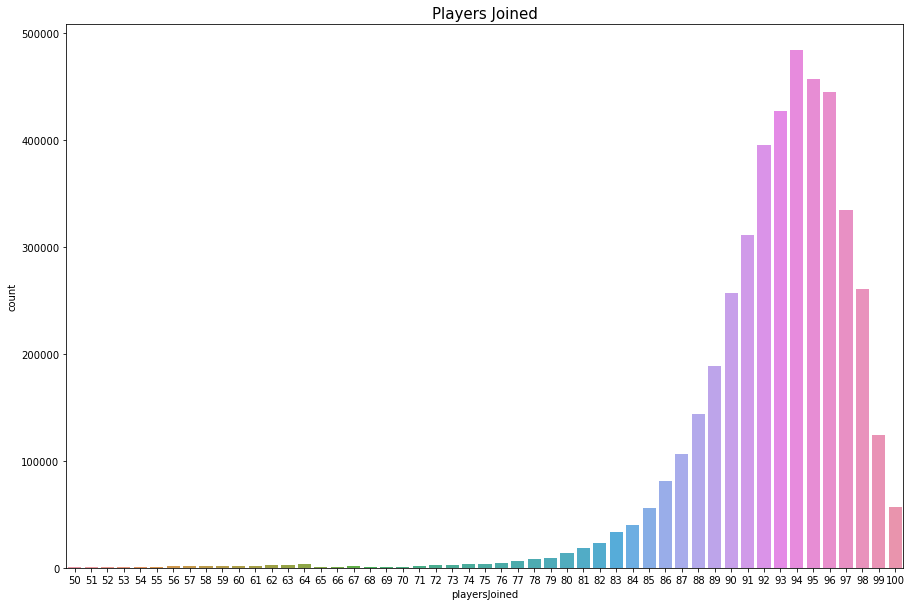

In [44]:
data=cleaned_data.copy()
data=data[data["playersJoined"]>49]
plt.figure(figsize=(15,10))
sns.countplot(data["playersJoined"])
plt.title("Players Joined",fontsize=15)
plt.show()

In [6]:
cleaned_data["killsNorm"]=cleaned_data["kills"]*((100-cleaned_data["playersJoined"])/100+1)
cleaned_data["damageDealtNorm"]=cleaned_data["damageDealt"]*((100-cleaned_data["playersJoined"])/100+1)
cleaned_data["maxPlaceNorm"]=cleaned_data["maxPlace"]*((100-cleaned_data["playersJoined"])/100+1)
cleaned_data["matchDurationNorm"]=cleaned_data["matchDuration"]*((100-cleaned_data["playersJoined"])/100+1)
to_show=["Id","kills","damageDealt","damageDealtNorm","maxPlace","maxPlaceNorm","matchDuration","matchDurationNorm"]
cleaned_data[to_show][0:11]

,Id,kills,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.000,0.00000,28,29.68,1306,1384.36
1,eef90569b9d03c,0,91.470,100.61700,26,28.60,1777,1954.70
2,1eaf90ac73de72,0,68.000,72.76000,50,53.50,1318,1410.26
3,4616d365dd2853,0,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,100.000,106.00000,97,102.82,1424,1509.44
5,ff79c12f326506,1,100.000,109.00000,28,30.52,1395,1520.55
6,95959be0e21ca3,0,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,8.538,9.22104,96,103.68,1967,2124.36
8,1a68204ccf9891,0,51.600,54.69600,28,29.68,1375,1457.50
9,e5bb5a43587253,0,37.270,40.25160,29,31.32,1930,2084.40


In [7]:
df1.sample(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3752040,91aec57bcd955c,4a8a4d6b2f098e,b100dde216efdc,0,3,58.05,0,0,3,52,...,1,0.0,0,0.0,0,0,2613.00,3,0,0.6897
413371,ad68afd8319bbd,6e04e7923a9c9c,1433a12625ddf0,0,0,63.24,0,0,0,74,...,0,0.0,0,0.0,0,0,171.40,1,0,0.2917
1425498,b9ee3eb6b6713b,f4574ce80e1624,177073672316f1,1,2,265.90,1,0,6,62,...,0,0.0,0,0.0,0,0,387.40,4,1498,0.5000
4166142,649e30e5aaa81d,3836a63b8daea6,61ecb5e76eb473,0,0,0.00,0,0,1,63,...,0,0.0,0,0.0,0,0,158.70,3,1538,0.3298
1175285,1ec50cc0c5f2c7,aff9172d880250,f5509a8f8c1291,0,0,0.00,0,0,0,77,...,0,0.0,0,0.0,0,0,24.68,1,1510,0.2449
566868,1ffdde5ed13fab,36502216d0b280,f8633dfe225545,0,0,0.00,0,0,0,89,...,0,0.0,0,0.0,0,0,19.88,0,0,0.0000
1318103,182a37f116ec05,32d7450f2a9e44,d9bb657ae7813e,0,0,0.00,0,0,0,80,...,0,0.0,0,0.0,0,0,221.70,2,1431,0.1489
4214026,92cce9af7083be,a421614b987568,7b180ab1c532a5,0,1,14.60,1,1,1,27,...,0,553.4,0,0.0,0,0,2461.00,6,1474,0.6800
2746317,aa44b9782e7df8,5103decd19d734,3bc6e162d01ce7,0,0,112.10,1,1,1,39,...,1,0.0,0,0.0,0,0,308.60,3,0,0.3750
179346,1c3d0a9b1334f0,2986e38b20a366,eaee5e99d7e6d2,0,2,115.00,0,0,0,11,...,0,0.0,0,112.1,0,0,3315.00,6,1587,1.0000


In [8]:
match=cleaned_data.groupby("matchId")
cleaned_data["killsPerc"]=match["kills"].rank(pct=True).values
cleaned_data["killsPlacePerc"]=match["killPlace"].rank(pct=True).values
cleaned_data["walkDistancePerc"]=match["walkDistance"].rank(pct=True).values
cleaned_data["damageDealtPerc"]=match["damageDealt"].rank(pct=True).values

In [9]:
cleaned_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,killswithoutMoving,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,killsPerc,killsPlacePerc,walkDistancePerc,damageDealtPerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,False,94,0.00,0.000,29.68,1384.36,0.297872,0.638298,0.468085,0.148936
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,False,90,0.00,100.617,28.60,1954.70,0.250000,0.633333,0.555556,0.433333
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,False,93,0.00,72.760,53.50,1410.26,0.279570,0.505376,0.344086,0.419355
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,False,91,0.00,35.861,33.79,1565.24,0.274725,0.824176,0.230769,0.296703
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,False,94,1.06,106.000,102.82,1509.44,0.659574,0.478723,0.180851,0.563830


In [11]:
corr=cleaned_data[["killsPerc","killsPlacePerc","walkDistance","damageDealtPerc","walkPerkillsPerc","winPlacePerc"]].corr()

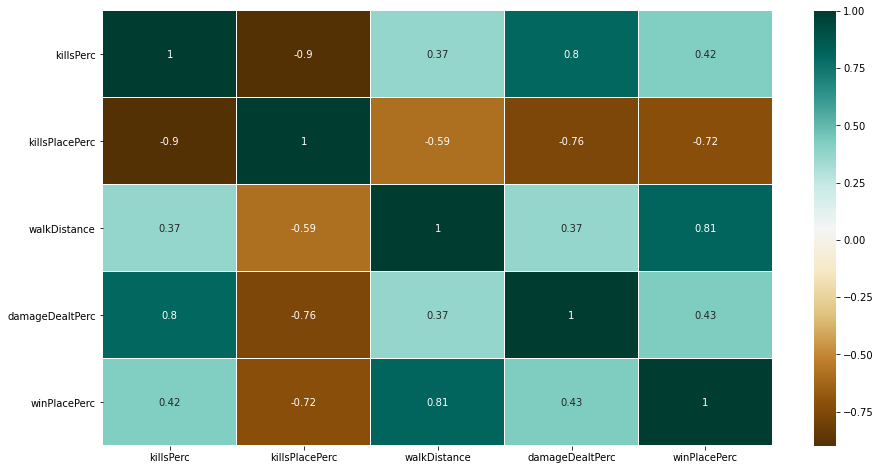

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(
corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,
annot=True,
linecolor="white",
linewidths=0.1,
cmap="BrBG")
plt.show()

In [15]:
cleaned_data.shape

(4347318, 41)

In [17]:
cleaned_data.drop(["killPoints","matchDuration","maxPlace","numGroups","rankPoints","roadKills","teamKills","winPoints","playersJoined","maxPlaceNorm"],inplace=True)

KeyError: "['killPoints' 'matchDuration' 'maxPlace' 'numGroups' 'rankPoints'\n 'roadKills' 'teamKills' 'winPoints' 'playersJoined' 'maxPlaceNorm'] not found in axis"